In [79]:
# Plotting the solution to the Riccati equation given by Kendall & McKendrick

In [141]:
import numpy as np
from numpy import tanh, arctanh
from matplotlib import pyplot as plt

In [147]:
beta = 0.18 # For the approximation of beta see 'exploration.ipynb'
gamma = 1.0/14.0
N = 8.0 * 10**7
t_0 = 0.0
T = 365 # Period to be plotted (in days since t_0)
I_0 = 1.0
S_0 = N-I_0
rho = gamma/beta * N
mu = (S_0/rho - 1)
delta = (rho**2)/S_0
alpha = np.sqrt(mu**2 + 2*(N-S_0)/delta)
phi = arctanh(mu/alpha) + (alpha*gamma*t_0)/2
t = np.arange(T + 1)

In [148]:
R = delta*(mu + alpha * tanh(alpha*gamma*t/2-phi))
I = alpha**2 * delta/2 * (1-tanh(alpha*gamma*t/2-phi)**2)
S = rho * (-alpha*tanh(alpha*gamma*t/2-phi)+1)

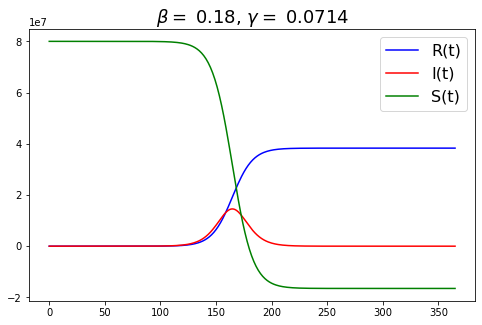

In [149]:

fig, ax = plt.subplots(figsize = (8,5))
ax.margins(0.05)
ax.set_title(f"$\\beta = $ {str(round(beta,4))}, $\\gamma = $ {str(round(gamma,4))}", fontsize = 18)
ax.plot(t,R, label="R(t)", color="blue",)
ax.plot(t,I, label="I(t)", color="red",)
ax.plot(t,S, label="S(t)", color="green",)
plt.rc('legend',fontsize=16)
ax.legend()
plt.show()

In [137]:
S

array([ 79999995.        ,  79999994.04932569,  79999992.98962379,
        79999991.80839048,  79999990.49168803,  79999989.0239802 ,
        79999987.38794903,  79999985.56429046,  79999983.53148654,
        79999981.26555154,  79999978.73974898,  79999975.92427607,
        79999972.78591216,  79999969.28762668,  79999965.38814227,
        79999961.04144768,  79999956.1962549 ,  79999950.79539403,
        79999944.77513865,  79999938.06445396,  79999930.58415861,
        79999922.24599047,  79999912.95156509,  79999902.59121497,
        79999891.04269554,  79999878.16974281,  79999863.8204655 ,
        79999847.82555307,  79999829.9962778 ,  79999810.12226816,
        79999787.96902663,  79999763.27516289,  79999735.7493098 ,
        79999705.06668556,  79999670.86526184,  79999632.74149233,
        79999590.24555159,  79999542.87602778,  79999490.07400702,
        79999431.21647918,  79999365.6089878 ,  79999292.47743693,
        79999210.95895885,  79999120.09173442,  79999018.80364